## Book Analysis

My attention was drawn to this project while I was reading *The protrait of
an artist as a young man* by James Joyes. Beside the style of the
text, the number of new words and expressions are an important factor
that makes how hard is a text to understand. That encourages me to
perform some basic analysis and compare the result for few well-known
authors such as Jame Joyce, Jane Austin, Bram Stoker and english
translation of works by Friedrich Nietzche.

Fortunately, the texts can be collected from [Gutenberg
project](https://www.gutenberg.org). Frist I performed a simple
analysis and build a dictionary of new words and number of occurance
of each words in the text.



In [1]:
import string
import numpy as np
import os
import matplotlib.pyplot as pl
%matplotlib inline

In [2]:
def word_histogram(file_name):
    """ read a txt file and count number of occurance of words. 
    Each word and number of occurance are stored into a dic
    """
    try:
        fin = open(file_name)
    except:
        print('The file can not be opened')
        
    print('========================================')
    lines = fin.readlines()
    print(' Number of lines in this file: ', len(lines))
    print('Preparing the file for analysis ...')
    hist = dict()               # empty dic to store num of words

    for line in lines:
        # split the line into words
        line = line.replace('-', ' ')
        for word in line.split():
            # get rid of white space and punctuation
            word = word.strip(string.whitespace + string.punctuation)
            word = word.lower()
            hist[word] = hist.get(word,0) + 1
    print('Number of unique words: ', len(hist))
    return hist

In [3]:
def most_common(hist):
    """ find most common words with number of occurance 
    and sort them"""
    t = []
    for key, value in hist.items():
        t.append((value,key))
    t.sort(reverse=True)
    return t
########################################
def total_num_words(hist):
    tot = 0
    for n_val in hist.values():
        tot += n_val
    print('the total number of words', tot)
    return tot

Now we apply the same analysis to all texts stored in folders for each author.

In [4]:
author_names = ['Jane Austin', 'Bram Stoker', 'James Joyce', 'Friedrich Nietzsche']
path = os.path.abspath('./')
for author in author_names:
    print('\n')
    print('****************************************')
    print('        author:  %s ' % author)
    print('****************************************')
    folder = author.replace(' ', '_')
    
    os.chdir(path+'/'+folder)
    for file_in_dir in os.listdir():
        print('\n', file_in_dir)
        hist = word_histogram(file_in_dir)
        t = most_common(hist)
        print('Ratio of new words to total: ', len(t)/total_num_words(hist))



****************************************
        author:  Jane Austin 
****************************************

 Emma.txt
 Number of lines in this file:  16633
Preparing the file for analysis ...
Number of unique words:  8905
the total number of words 164120
Ratio of new words to total:  0.05425907872288569

 Persuasion.txt
 Number of lines in this file:  8734
Preparing the file for analysis ...
Number of unique words:  6190
the total number of words 86755
Ratio of new words to total:  0.0713503544464296

 MansfieldPark.txt
 Number of lines in this file:  15747
Preparing the file for analysis ...
Number of unique words:  9376
the total number of words 163560
Ratio of new words to total:  0.05732452922474933

 LadySusan.txt
 Number of lines in this file:  2921
Preparing the file for analysis ...
Number of unique words:  3375
the total number of words 26227
Ratio of new words to total:  0.12868418042475313

 TheLettersofJaneAusten.txt
 Number of lines in this file:  8972
Preparing the

#### Plotting

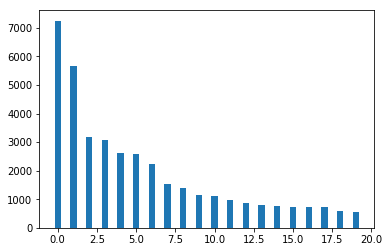

In [5]:
word_arr = np.zeros((len(t)), dtype=int)
indx = np.ones((word_arr.shape[0]), dtype = int)

for i in range(len(t)):
    word_arr[i] = t[i][0]

for i in range(len(word_arr)):
    indx[i] = i
    

pl.bar(indx[:20], word_arr[:20], width=0.4)
pl.show()

#### Markovian Analysis of text
The functions relating to Markovian analysis of the text are from book * Think Python *

In [6]:
def word_analysis(file_name):
    """ read a text file and make a list of words"""
    # open file
    try:
        fin = open(file_name)
    except:
        print('The file can not be opened')
        
    lines = fin.readlines()
    print('Number of lines of file "%s" is %d' %(file_name, len(lines)))
    word_list = []
    lcount = 0
    for line in lines:
        # split the line into words
        line = line.replace('-', '')
        for word in line.split():
            # get rid of white space and punctuation
            word = word.strip(string.whitespace + string.punctuation)
            word = word.lower()
            word_list.append(word)
    return word_list

In [7]:
def shift(t, word):
    """ forms a new tuple by removing the head and adding word to the tail.
    t: tuple of strings for the prefix
    word: string
    
    returns: tuple of strings"""
    return t[1:] + (word,)

In [8]:
def word_process(word_list, order=2):
    """ processes each words
    
    during the first few iteration, all we do is store up the words;
    after that we start adding entries to the dictionary.
    """
    prefix = ()
    suffix_map = {}
    
    for word in word_list:
        if len(prefix) < order:
            prefix  += (word, )
            continue
        try:
            suffix_map[prefix].append(word)
        except KeyError:
            # if there is no entry for this prefix make one
            suffix_map[prefix] = [word]
        
        prefix = shift(prefix, word)
            
        
    return suffix_map    
        

In [19]:
# test if it works
print(os.getcwd())
os.chdir('/home/amin/Dropbox/Codes/Book_Analysis/')
file_name = 'emma.txt'
try:
    fin = open(file_name)
except:
    print('There is somethign wrong')

word_process(word_analysis(file_name))

print('Markov dictionary has been made!')

/home/amin/Dropbox/Codes/Book_Analysis
Number of lines of file "emma.txt" is 17078
Markov dictionary has been made!


Random text generator must be added.